In [38]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sns

# Create a stimulus set
Minerva2 first assumes that stimuli we experience are represented by multidimensional vectors of features (e.g., is red, is fuzzy, has teeth, is plastic, etc.). These features can take on one of two values (i.e., they are binary features). One way to think about these values is that they represent whether or not that feature is present (1) or absent (-1). That means any given experience can be represented by a very long array of 1s and -1s. 

Below is a function (create_items) that randomly generates stimuli according to this coding scheme. You can define the number of items (n) and the number of feature dimensions (ndim) in calling the function and it will return the corresponding stimuli representations (note, different stimuli are coded in rows and features are coded in columns).

In [48]:
def create_stimuli(n=40,ndim=10):
    items = 2*np.round(np.random.random_sample(size=(n,ndim)))-1
    return(items)

Let's try it out! I would like 3 stimuli consisting of 5 feature dimensions.

In [49]:
stimuli = create_stimuli(n=3,ndim=5)
print(stimuli)

[[-1. -1. -1. -1.  1.]
 [ 1. -1.  1. -1. -1.]
 [-1.  1. -1.  1.  1.]]


What if we wanted 10 stimuli each with 15 feature dimensions?

In [50]:
stimuli = create_stimuli(n=10,ndim=15)
print(stimuli)

[[-1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [ 1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.]
 [-1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.]
 [-1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.]
 [-1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.]
 [ 1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.]
 [-1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.]
 [-1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.]]


Easy, eh? Now, we will use this handy function later on below.

# Minerva2
Minerva2 formalises memory encoding and retrieval functions. It assumes that all memory traces (i.e., representations of stimuli) are stored in a matrix, we are going to call this memory. Simply put, each row represents an experienced stimulus with columns coding for the different feature dimensions. 
## Encoding
Minerva2 hypothesizes that memory encoding isn't perfect. When encoding a stimulus, there is a probability L that a feature is encoded properly and 1-L that it is not (i.e., stored as a value 0; you can think of this as a forgotten feature). Here's how to implement encoding into a python function: 

In [73]:
def encode_memory(stimuli,L):
    for s in range(len(stimuli)):
        tmp = np.array(stimuli[s])             # make a copy of the stimulus
        for x in range(len(stimulus)):         # encode each feature, some correctly others not
            if np.random.rand()>L:
                tmp[x] = 0
        if s==0:                               # add the trace to the memory matrix
            memory = np.array([tmp])
        else:        
            memory = np.append(memory,[tmp],0)           
    return(memory)

Let's test it out! We will assume we have 10 stimuli each with 8 feature dimensions. And, we will encode all of the stimuli into memory with an encoding rate (L) of 0.8 (i.e., 80% chance of correctly encoding the feature value). 

In [77]:
n = 10                                         # number of items
ndim = 8                                       # number of dimensions
stimuli = create_stimuli(n=n,ndim=ndim)        # create the stimuli
L = 0.8                                        # encoding rate
memory = encode_memory(stimuli,L)    # encode stimuli to memory
memory

array([[ 0.,  0.,  1.,  1., -1.,  1.,  1., -1.],
       [ 1., -1.,  1.,  1.,  1., -1.,  1., -1.],
       [ 1., -1.,  0., -1.,  1.,  0.,  1.,  1.],
       [ 0., -1.,  0., -1.,  1.,  0.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0., -1.,  0., -1., -1.],
       [ 1.,  1.,  1., -1.,  1.,  0.,  0., -1.],
       [-1., -1., -1.,  1.,  1., -1., -1.,  0.],
       [ 0., -1.,  1., -1.,  0., -1., -1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1.,  0.]])

Many of the features are properly encoded, but some (about 20%) are not!

In [195]:
def retrieve(probe,memory):
    echo = np.zeros(ndim_stim)
    for n in range(len(memory)):
        activation = (sum(probe*memory[n][ndim_name:])/len(probe))**3
        echo = echo + activation*memory[n][:ndim_name]
    return echo/max(echo)

<Container object of 13 artists>

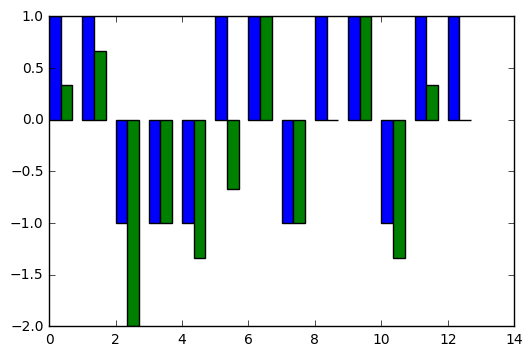

In [206]:
probe = names[2]
echo = retrieve(probe,memory)

xb = np.arange(ndim_stim)
width = 0.35
plt.bar(xb,protos[2],width)
plt.bar(xb+width,echo,width,color='g')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]